<a href="https://colab.research.google.com/github/GeraldKaeferle/deeplearning2020/blob/master/training_week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# ohne Ausrufezeichen bei Ausführung im lokalen Notebook
!pip install --upgrade deeplearning2020

     |████████████████████████████████| 399kB 7.2MB/s 
  Created wheel for deeplearning2020: filename=deeplearning2020-0.4.17-py2.py3-none-any.whl size=8393 sha256=b3dbc8dfb5e2cdea7312bad1009cc7245951c49799e6df769894e492988912a4
  Stored in directory: /root/.cache/pip/wheels/93/fa/d0/a004ae07a37f938d804c3c0c7819e96f679606fd901d665877
  Created wheel for kerasltisubmission: filename=kerasltisubmission-0.4.9-py2.py3-none-any.whl size=8867 sha256=ca285ab63f825046e588a17ba0359a3fed735cfd9bf87f2c8a8e95493418cdce
  Stored in directory: /root/.cache/pip/wheels/fd/61/f7/09171376b25408ae21b58e98c9fbf2eb924f676bb77659f983
Successfully built deeplearning2020 kerasltisubmission


In [0]:
%tensorflow_version 2.x
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.layers import Dense, Activation, Input, \
  Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

from deeplearning2020.datasets import ImageWoof
from deeplearning2020 import helpers
# jupyters notebook Befehl zum direkten Anzeigen von Matplotlib Diagrammen
%matplotlib inline

In [5]:
train_data, test_data, classes = ImageWoof.load_data()

328294400/328288506 [==============================] - 7s 0us/step
/root/.keras/datasets/imagewoof2-320/train
Loaded 9025 images
/root/.keras/datasets/imagewoof2-320/val
Loaded 3929 images


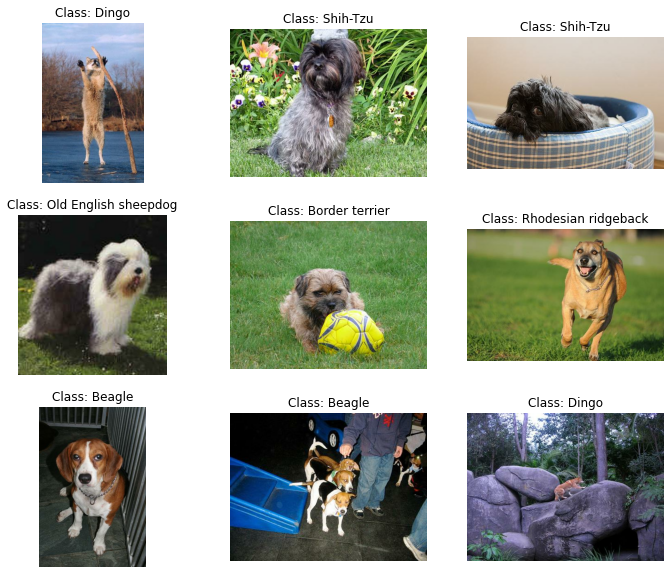

In [6]:
helpers.plot_images(train_data.take(9), classes)

In [0]:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [300, 300])
    return resized_image, label

In [8]:
# Festlegung der Batch Größe für die Datenvorbereitung
batch_size = 32 

# Durchmischen der Trainingsdaten, dass nicht mit sortierten Bildern trainiert wird 

train_data = train_data.shuffle(1000) 

print('shape des Trainigsdatensatzes vor dem preprocessing: ', train_data)

train_data = train_data.map(preprocess) \
  .batch(batch_size).prefetch(1)          
test_data = test_data.map(preprocess) \
  .batch(batch_size).prefetch(1)

print('shape des Traingingsdatensatzes nach dem preprocessing: ', train_data)
n_classes=len(classes)

shape des Trainigsdatensatzes vor dem preprocessing:  <ShuffleDataset shapes: ((None, None, 3), ()), types: (tf.float32, tf.int64)>
shape des Traingingsdatensatzes nach dem preprocessing:  <PrefetchDataset shapes: ((None, 300, 300, 3), (None,)), types: (tf.float32, tf.int64)>


In [9]:
classes

array(['Shih-Tzu', 'Rhodesian ridgeback', 'Beagle', 'English foxhound',
       'Border terrier', 'Australian terrier', 'Golden retriever',
       'Old English sheepdog', 'Samoyed', 'Dingo'], dtype='<U20')

In [43]:
# model
learning_rate=0.001
momentum=0.9
dense_neurons=1000
n_filters=512
first_kernel_size=(7,7)

activation='elu'

# Inputgröße muss 300x300 Pixel mit 3 RGB Farben betragen
input_layer = Input(shape=(300, 300, 3))

# Convolutional Neural Network
# 6 Convolutional Layers mit jeweils einer Max Pooling Layer
model = Conv2D(
    filters=256,
    kernel_size=(7,7),
    activation=activation
)(input_layer)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = 256, 
    kernel_size=(3,3), 
    activation=activation
)(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = n_filters, 
    kernel_size=(3,3), 
    activation=activation
)(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = n_filters, 
    kernel_size=(3,3), 
    activation=activation
)(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = n_filters, 
    kernel_size=(3,3), 
    activation=activation
)(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(filters = n_filters, 
  kernel_size=(3,3), 
  activation=activation, 
  padding='same'
)(model)
model = MaxPooling2D((2,2))(model)

# Fully-Connected-Classifier
model = Flatten()(model)
model = Dense(
    dense_neurons,
    activation=activation
)(model)

model = Dense(
    dense_neurons / 2,
    activation='tanh'
)(model)

# Output Layer
output = Dense(n_classes, activation="softmax")(model)

CNN_model = Model(input_layer, output)

# Kompilieren des Modells
optimizer = tf.keras.optimizers.SGD(lr=learning_rate, momentum=momentum)
optimizer = tf.keras.optimizers.Adam(learning_rate)
CNN_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)
CNN_model.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 294, 294, 256)     37888     
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 147, 147, 256)     0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 145, 145, 256)     590080    
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 72, 72, 256)       0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 70, 70, 512)       1180160   
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 35, 35, 512)       0  

In [0]:
# Training des Modells
history = CNN_model.fit(
    train_data,
    epochs=12,
    validation_data=test_data
)

Epoch 1/12
280/283 [============================>.] - ETA: 1s - loss: 2.4919 - accuracy: 0.1001

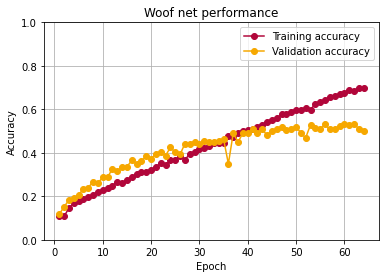

In [42]:
helpers.plot_history('Woof net performance', history, 0)